# Tutorial 3 - Data Collection

Nama: Muhammad Ichsanul Amal
<br>
NPM: 1906353454

Pada tutorial ini, kita akan melakukan:
1. Pengumpulan data dari Twitter menggunakan Tweepy (dengan Twitter Search API), Twint, dan Twecoll. Terdapat tiga jenis data yang akan kita kumpulkan, yaitu data <i>tweet</i>, data profil, dan data <i>network</i>.
2. Pengumpulan data dari Instagram dengan instaloader.
3. Pengumpulan data dari Linkedin dengan <i>web scraping</i>.

Sebelum memulai tutorial, kita akan menginstal <i>library</i> yang kita perlukan:

# Data Collection - Twitter (Tweepy)

## Twitter Search API

Pengumpulan data <i>tweet</i> dapat dilakukan dengan menggunakan Twitter API. Terdapat dua kategori API Twitter, yaitu Twitter Search API dan Twitter Streaming API. Perbedaan mendasar dari kedua jenis API tersebut adalah pada waktu data <i>tweet</i> yang akan dikumpulkan. Twitter Search API mengambil data <i>past tweet</i>, yaitu data <i>tweet</i> dengan kriteria tertentu yang diposting pada rentang waktu H-7 hari sampai dengan waktu <i>crawling</i>. Sementara itu, Twitter Streaming API akan mengambil data secara <i>real-time</i> pada saat program <i>crawling</i> dijalankan. Untuk memanggil kedua API tersebut, akan digunakan <i>library</i> Tweepy.

Langkah-langkah untuk melakukan proses <i>search tweet data</i> adalah sebagai berikut:

In [9]:
# import library
import tweepy

### Bearer token variable

Pertama-tama, kita harus mendaftarkan akun Twitter kita agar dapat menggunakan API. Mengikuti panduan untuk Twitter API v2, berikutnya kita perlu membuat sebuah proyek. Dari proyek tersebut kita dapat peroleh *bearer token*-nya. *Bearer token* tersebut wajib dimasukkan ke dalam parameter penggunaan Tweepy. 

In [10]:
bearer_token = "" # diisi

### Setting client

Pada tahap ini, kita membuat <i>client</i>  Tweepy dengan menggunakan otentikasi *bearer token*.

In [11]:
tweepy_client = tweepy.Client(bearer_token=bearer_token)

### Crawling tweet berdasarkan query 

Pada contoh <b>Code 1</b> di bawah ini, <i>tweet</i> yang ingin dicari adalah 10 <i>tweet</i> yang mengandung kata `ppkm` dan berbahasa Indonesia. Menggunakan method `search_recent_tweets()`, kita bisa mendapatkan *tweet* yang memenuhi kriteria *query* hingga 7 hari yang lalu.

Untuk mengetahui lebih lanjut soal *query search* di Twitter, bisa dibaca pada halaman ini: https://developer.twitter.com/en/docs/twitter-api/tweets/search/integrate/build-a-query

<b>Code 1</b>:

In [12]:
ppkm = tweepy_client.search_recent_tweets(query="ppkm lang:id", max_results=10)

print("Jumlah tweet yang berhasil didapatkan: {}.\n".format(len(ppkm.data)))

Jumlah tweet yang berhasil didapatkan: 10.



In [13]:
# objek ppkm
ppkm

Response(data=[<Tweet id=1506197736252919810 text='RT @Bebque__: Sudah selesai gelaran MotoGP, sekarang muncul PPKM lagi untuk Jawa-Bali. Padahal bentar lagi ramadhan dan lebaran. Kurva kopi…'>, <Tweet id=1506197616396496903 text='RT @Bebque__: Sudah selesai gelaran MotoGP, sekarang muncul PPKM lagi untuk Jawa-Bali. Padahal bentar lagi ramadhan dan lebaran. Kurva kopi…'>, <Tweet id=1506197567352188931 text='@Bebque__ Agar ppkm lg...🤭 https://t.co/4uMMhxdvQI'>, <Tweet id=1506197560029249541 text='RT @DeeJee_007: Oyen pulang klo dijemput 😍😁\n🤭😁🙈😂\n\nTongkrongan Tempe Purwokerto\nCloud Engineer Anies Indonesia\nSenin Selasa Sarapan pagii Ep…'>, <Tweet id=1506197463392452609 text='RT @Bebque__: Sudah selesai gelaran MotoGP, sekarang muncul PPKM lagi untuk Jawa-Bali. Padahal bentar lagi ramadhan dan lebaran. Kurva kopi…'>, <Tweet id=1506197447311200257 text='RT @detikcom: Aturan PPKM level 2 di wilayah Jawa dan Bali kembali diperbarui. Ini isi lengkapnya dalam Inmendagri No 18 Tahun 2022. h

In [14]:
# contoh data
ppkm.data

[<Tweet id=1506197736252919810 text='RT @Bebque__: Sudah selesai gelaran MotoGP, sekarang muncul PPKM lagi untuk Jawa-Bali. Padahal bentar lagi ramadhan dan lebaran. Kurva kopi…'>,
 <Tweet id=1506197616396496903 text='RT @Bebque__: Sudah selesai gelaran MotoGP, sekarang muncul PPKM lagi untuk Jawa-Bali. Padahal bentar lagi ramadhan dan lebaran. Kurva kopi…'>,
 <Tweet id=1506197567352188931 text='@Bebque__ Agar ppkm lg...🤭 https://t.co/4uMMhxdvQI'>,
 <Tweet id=1506197560029249541 text='RT @DeeJee_007: Oyen pulang klo dijemput 😍😁\n🤭😁🙈😂\n\nTongkrongan Tempe Purwokerto\nCloud Engineer Anies Indonesia\nSenin Selasa Sarapan pagii Ep…'>,
 <Tweet id=1506197463392452609 text='RT @Bebque__: Sudah selesai gelaran MotoGP, sekarang muncul PPKM lagi untuk Jawa-Bali. Padahal bentar lagi ramadhan dan lebaran. Kurva kopi…'>,
 <Tweet id=1506197447311200257 text='RT @detikcom: Aturan PPKM level 2 di wilayah Jawa dan Bali kembali diperbarui. Ini isi lengkapnya dalam Inmendagri No 18 Tahun 2022. https:…'>,

In [15]:
# parse ke format tabular (pandas dataframe)
import pandas as pd
pd.set_option('max_colwidth', 1000)

df_ppkm = pd.DataFrame()
for t in ppkm.data:
    df_ppkm = df_ppkm.append({
        'id': t.id,
        'text': t.text
    }, ignore_index=True)

df_ppkm

,id,text
0,1.506198e+18,"RT @Bebque__: Sudah selesai gelaran MotoGP, sekarang muncul PPKM lagi untuk Jawa-Bali. Padahal bentar lagi ramadhan dan lebaran. Kurva kopi…"
1,1.506198e+18,"RT @Bebque__: Sudah selesai gelaran MotoGP, sekarang muncul PPKM lagi untuk Jawa-Bali. Padahal bentar lagi ramadhan dan lebaran. Kurva kopi…"
2,1.506198e+18,@Bebque__ Agar ppkm lg...🤭 https://t.co/4uMMhxdvQI
3,1.506198e+18,RT @DeeJee_007: Oyen pulang klo dijemput 😍😁\n🤭😁🙈😂\n\nTongkrongan Tempe Purwokerto\nCloud Engineer Anies Indonesia\nSenin Selasa Sarapan pagii Ep…
4,1.506197e+18,"RT @Bebque__: Sudah selesai gelaran MotoGP, sekarang muncul PPKM lagi untuk Jawa-Bali. Padahal bentar lagi ramadhan dan lebaran. Kurva kopi…"
5,1.506197e+18,RT @detikcom: Aturan PPKM level 2 di wilayah Jawa dan Bali kembali diperbarui. Ini isi lengkapnya dalam Inmendagri No 18 Tahun 2022. https:…
6,1.506197e+18,RT @karirmuid: Tau gak?\n\nKalau HRD suka lampiran CV seperti ini!!!\n\n#ONEPIECE1044\nPPKM https://t.co/2NmFTuOL1v
7,1.506197e+18,"Operasi yustisi dalam rangka ppkm level 3 di wilayah kec.Sawit @ Boyolali, Jawa Tengah, Indonesia https://t.co/xI4iVcJeJ7"
8,1.506197e+18,Sastus Terbaru Daerah PPKM Level 1 hingga 3 di Jawa Bali https://t.co/KHv20punX3
9,1.506197e+18,"Kota Semarang Masuk PPKM Level 2, Hendi Minta Warga untuk Segera Vaksinasi Booster\n\n#vaksin \n#PPKM\n#boster\n\n@suaramerdeka\n@hendrarprihadi\n@PemkotSmg\n\nhttps://t.co/8gGKfgPur8"


### <i>Crawling tweet</i> dari <i>username</i> spesifik

Untuk mendapatkan <i>tweet</i> dari <i>username</i> spesifik, digunakan fungsi `get_users_tweets()` dengan parameter `user_id`. Pada contoh ini akan diambil 10 <i>tweet</i> terkini dari @Univ_Indonesia. 

In [16]:
# 1. user lookup untuk mendapatkan ID
user = tweepy_client.get_user(username='univ_indonesia')
user_id = user.data.id
print("User ID untuk @univ_indonesia adalah:", user_id)

# 2. search tweet yang diposting oleh user ID tertentu
ui = tweepy_client.get_users_tweets(user_id, max_results=10)
print("Jumlah tweet dari @univ_indonesia yang berhasil didapatkan: {}.\n".format(len(ui.data)))

User ID untuk @univ_indonesia adalah: 74646907
Jumlah tweet dari @univ_indonesia yang berhasil didapatkan: 10.



In [17]:
# contoh data
ui.data

[<Tweet id=1504766249964032001 text='Mahasiswa @Medicine_UI  raih juara di AMSA Internasional dan kompetisi fisiologi internasional di University of Health and Welfare, Jepang. Simak berita baik dari UI pekan ini dan dapatkan selengkapnya di https://t.co/QQb9GCdoNl. Selamat menikmati akhir pekan. https://t.co/SnZ2GYet58'>,
 <Tweet id=1504009074592997376 text='Lokasi kampus UI terdapat di Salemba, Jakarta Pusat dan Depok, Jawa Barat. Sedangkan untuk penerimaan melalui jalur SNMPTN yang diselenggarakan LTMPT, pada tahun ini UI masuk ke wilayah DKI Jakarta dan Jawa Barat 😊 https://t.co/WFzRt5lZir'>,
 <Tweet id=1503574424888348672 text='@aprilscnd @ui Halo,\nApabila terdapat kendala pada webmail UI Anda, silakan melapor ke DSTI UI melalui email ke support@ui.ac.id dengan melampirkan Nama, NPM, Program Studi, dan permasalahannya.'>,
 <Tweet id=1502986716751474693 text='RT @ltmptofficial: H-4 PENUTUPAN REGISTRASI AKUN LTMPT UNTUK UTBK-SBMPTN 2022 \n\nHalo Calon Mahasiswa Indonesia!\n\nRegist

## Twitter Streaming API

*Tweet* yang dikumpulkan menggunakan Twitter Streaming API merupakan data <i>tweet</i> yang bersifat <i>real time</i>. Langkah-langkah melakukan pengumpulan data dengan <i>Twitter Streaming API</i> adalah sebagai berikut:

### Membuat StreamingClient

Kelas `StreamingClient` akan memberikan informasi mengenai status <i>request data</i> Twitter yang kita cari. Pada kelas ini, terdapat dua fungsi yaitu fungsi `on_tweet()` yang mengembalikan data yang kita <i>request</i> dan fungsi `on_connection_error()` yang memberikan informasi jika koneksi gagal.

Di dalam fungsi `on_tweet()`, akan didapatkan object Tweet dari Tweepy yang berisi data hasil <i>request</i>. Sementara itu, fungsi `on_connection_error()` memutus koneksi jika terdapat masalah <i>request</i>.

In [18]:
# import library
from tweepy import StreamingClient

class CustomStreamingClient(StreamingClient):
    def on_tweet(self, tweet):
        print(tweet.text)

    def on_connection_error(self):
        print("Connection error, stopping stream...")
        self.disconnect()

### Membuat stream

Kelas `CustomStreamingClient` digunakan untuk melakukan <i>request streaming</i> berdasarkan autorisasi dari token API yang kita miliki.

Untuk standar parameter *filter* yang lain dapat dilihat di halaman <a href='https://developer.twitter.com/en/docs/tweets/filter-realtime/guides/basic-stream-parameters.html'>dokumentasi</a> Twitter.

<b>Code 2</b>:

In [19]:
custom_stream = CustomStreamingClient(bearer_token)

# membuat rules untuk filter
custom_stream.add_rules(tweepy.StreamRule("ukraine"))
custom_stream.add_rules(tweepy.StreamRule("lang:en"))

custom_stream.filter()

Stream encountered HTTP error: 503
Stream encountered HTTP error: 503
Stream encountered HTTP error: 503


@Credit_Agricole Crédit Agricole, votre argent peut financer de merveilleux projets de paix. Mais vous restez sur le marché russe, un pays qui a commencé et continue la guerre en Ukraine et tue des enfants ! Arrêtez toute activité commerciale en Russie. Fermez vos succursales. https://t.co/zMnMb4aPfh
RT @justinsuntron: In 48 hours until 02/28/2022 21:00 GMT+8, Ukraine🇺🇦 #TRON accounts TEFccmfQ38cZS1DTZVhsxKVDckA8Y6VfCy has received total…
RT @HoansSolo: Short summary of the military situation in Ukraine (March 22)

Little change to overall operational picture:
 
-pace of 🇷🇺 o…
RT @CalltoActivism: BREAKING: VK, Russia's largest social media platform, has been hacked. Messages were sent to users that tell the true n…
RT @mateo_tao: Another 67 surrender. These soldiers do not want to die for the regime in Kiew who has perpetuated a 8 year long genocidal w…
podcast - @jheil interviews @RadioFreeTom about the Russian invasion of Ukraine, Putin, President Zelenskyy, Biden

https://t.co/W5Q7p

KeyboardInterrupt: 

In [20]:
# objek custom stream
custom_stream

In [21]:
# cek rules yang sudah di-add
custom_stream.get_rules()

Response(data=[StreamRule(value='ukraine', tag=None, id='1506197809451900931')], includes={}, errors=[], meta={'sent': '2022-03-22T09:16:46.299Z', 'result_count': 1})

In [22]:
# menghapus stream rules
custom_stream.delete_rules(ids='1505082423637266432')

Response(data=None, includes={}, errors=[{'errors': [{'parameters': {}, 'message': 'Rule does not exist'}], 'title': 'Invalid Request', 'detail': 'One or more parameters to your request was invalid.', 'type': 'https://api.twitter.com/2/problems/invalid-request'}], meta={'sent': '2022-03-22T09:16:51.443Z', 'summary': {'deleted': 0, 'not_deleted': 1}})

In [23]:
custom_stream.get_rules()

Response(data=[StreamRule(value='ukraine', tag=None, id='1506197809451900931')], includes={}, errors=[], meta={'sent': '2022-03-22T09:16:54.153Z', 'result_count': 1})

## Data User - Twitter

Selain data *tweet*, data profil akun Twitter juga dapat didapatkan. Karena sebelumnya kita telah mengambil data tweet menggunakan *bearer token*, di tahap ini kita akan mencoba autentikasi user menggunakan token. Jika ingin mencoba mengambil data user dengan menggunakan *bearer token*, teman-teman bisa mengikuti sampel kode <a href="https://github.com/twitterdev/Twitter-API-v2-sample-code/blob/main/User-Lookup/get_users_with_bearer_token.py">ini</a>.  

In [24]:
consumer_key = "" # diisi
consumer_secret = "" # diisi

<b>Code 3</b>

In [25]:
from requests_oauthlib import OAuth1Session
# field user yg ingin diambil, referensi: https://developer.twitter.com/en/docs/twitter-api/data-dictionary/object-model/user
fields = "created_at,description,entities,id,location,name,pinned_tweet_id,profile_image_url,protected,public_metrics,url,username,verified,withheld"
params = {"usernames": "NajwaShihab,gojektech", "user.fields": fields}
request_token_url = "https://api.twitter.com/oauth/request_token"
oauth = OAuth1Session(consumer_key, client_secret=consumer_secret)
fetch_response = oauth.fetch_request_token(request_token_url)

In [26]:
# objek response
fetch_response

{'oauth_token': 'b-wqAgAAAAABaVF7AAABf7DqS1Q',
 'oauth_token_secret': 'gKr0EQREr7lXnCDCgkXHjR8E1kE3O3s4',
 'oauth_callback_confirmed': 'true'}

In [27]:
resource_owner_key = fetch_response.get("oauth_token")
resource_owner_secret = fetch_response.get("oauth_token_secret")

In [28]:
# authorisasi
base_authorization_url = "https://api.twitter.com/oauth/authorize"
authorization_url = oauth.authorization_url(base_authorization_url)
print("Please go here and authorize: %s" % authorization_url)
verifier = input("Paste the PIN here: ")

Please go here and authorize: https://api.twitter.com/oauth/authorize?oauth_token=b-wqAgAAAAABaVF7AAABf7DqS1Q


In [29]:
# Get the access token
access_token_url = "https://api.twitter.com/oauth/access_token"
oauth = OAuth1Session(
    consumer_key,
    client_secret=consumer_secret,
    resource_owner_key=resource_owner_key,
    resource_owner_secret=resource_owner_secret,
    verifier=verifier,
)
oauth_tokens = oauth.fetch_access_token(access_token_url)

access_token = oauth_tokens["oauth_token"]
access_token_secret = oauth_tokens["oauth_token_secret"]

# make the request
oauth = OAuth1Session(
    consumer_key,
    client_secret=consumer_secret,
    resource_owner_key=access_token,
    resource_owner_secret=access_token_secret,
)

In [30]:
response = oauth.get(
    "https://api.twitter.com/2/users/by", params=params
)

if response.status_code != 200:
    raise Exception(
        "Request returned an error: {} {}".format(response.status_code, response.text)
    )

print("Response code: {}".format(response.status_code))

json_response = response.json()

Response code: 200


In [31]:
# objek response
json_response

{'data': [{'name': 'Najwa Shihab',
   'description': 'Founder https://t.co/1H5VBxjbYU\nTwitter: @narasitv',
   'profile_image_url': 'https://pbs.twimg.com/profile_images/839298349148717056/yEE35xbx_normal.jpg',
   'created_at': '2008-10-22T21:15:07.000Z',
   'location': 'ÜT: -6.292607,106.821193',
   'verified': True,
   'protected': False,
   'id': '16912985',
   'public_metrics': {'followers_count': 8074446,
    'following_count': 487,
    'tweet_count': 25836,
    'listed_count': 3019},
   'url': 'https://t.co/Yg2rg6isix',
   'username': 'NajwaShihab',
   'entities': {'url': {'urls': [{'start': 0,
       'end': 23,
       'url': 'https://t.co/Yg2rg6isix',
       'expanded_url': 'http://www.narasi.tv',
       'display_url': 'narasi.tv'}]},
    'description': {'urls': [{'start': 8,
       'end': 31,
       'url': 'https://t.co/1H5VBxjbYU',
       'expanded_url': 'http://Narasi.TV',
       'display_url': 'Narasi.TV'}],
     'mentions': [{'start': 41, 'end': 50, 'username': 'narasitv'}]

# Data Collection - Twitter (Twint)

Selain menggunakan Tweepy, pengumpulan data <i>tweet</i> dapat juga dilakukan dengan menggunakan <i>library</i> <a href='https://github.com/twintproject/twint'>Twint</a>. Perbedaan <i>library</i> ini dengan Tweepy adalah tidak membutuhkan <i>access token</i> Twitter API.

Berikut merupakan contoh penggunaan Twint dalam melakukan <i>crawling tweet</i>:

In [32]:
# import library
import twint
import nest_asyncio

nest_asyncio.apply()

In [33]:
# need time about 10-15 mins

c = twint.Config()
keyword = 'goto'
c.Search = keyword # masukkan kata kunci
c.Since = '2022-03-15 00:00:00'
c.Until = '2022-03-15 23:59:59' 
c.Store_csv = True
c.Output = '{}.csv'.format(keyword)
c.Hide_output = True

twint.run.Search(c)

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [34]:
# explore data 
df_goto = pd.read_csv('goto.csv')
df_goto.info()
df_goto.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10989 entries, 0 to 10988
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10989 non-null  int64  
 1   conversation_id  10989 non-null  int64  
 2   created_at       10989 non-null  object 
 3   date             10989 non-null  object 
 4   time             10989 non-null  object 
 5   timezone         10989 non-null  int64  
 6   user_id          10989 non-null  int64  
 7   username         10989 non-null  object 
 8   name             10989 non-null  object 
 9   place            3 non-null      object 
 10  tweet            10989 non-null  object 
 11  language         10989 non-null  object 
 12  mentions         10989 non-null  object 
 13  urls             10989 non-null  object 
 14  photos           10989 non-null  object 
 15  replies_count    10989 non-null  int64  
 16  retweets_count   10989 non-null  int64  
 17  likes_count 

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1503883736345366530,1503883736345366530,2022-03-16 06:59:58 SE Asia Standard Time,2022-03-16,06:59:58,700,1376072002298019849,14106_s,ぷ。 ฅ(ᵔᴥᵔ)ฅやわやわ🚶‍♀️,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1503883692493606915,1503680965595451395,2022-03-16 06:59:47 SE Asia Standard Time,2022-03-16,06:59:47,700,992932185144348672,mowchan_mowchan,MOW/元保育者,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'LugcNzz4CPY0roF', 'name': 'たまご 6y&2y', 'id': '1264785023137271808'}]",NaN,NaN,NaN,NaN
2,1503883672705028099,1503883424192421893,2022-03-16 06:59:43 SE Asia Standard Time,2022-03-16,06:59:43,700,1227999980654407680,stemthebleeding,STEMtheBleeding,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'fit__feminist', 'name': 'Abadass Mom Bod', 'id': '4597876452'}]",NaN,NaN,NaN,NaN
3,1503883640983650307,1503883640983650307,2022-03-16 06:59:35 SE Asia Standard Time,2022-03-16,06:59:35,700,918325280950726656,osanpo_hiyoko,tekupiyo,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1503883626114859009,1503883626114859009,2022-03-16 06:59:31 SE Asia Standard Time,2022-03-16,06:59:31,700,1495109550596190212,goto1ri,☁️,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [35]:
# wordcloud tweet goto

# import library
import nltk
from nltk.tokenize import word_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
stop_factory = StopWordRemoverFactory()
stopwords = stop_factory.get_stop_words()

from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

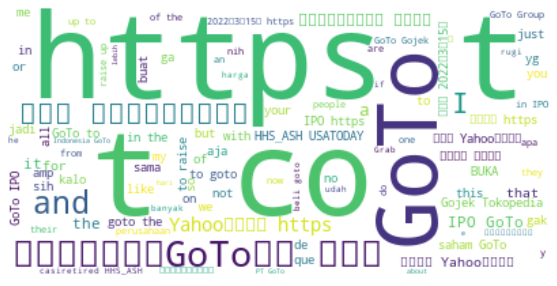

In [36]:
text = ' '.join(df_goto['tweet'].unique().tolist())

# create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords, max_words=100, background_color="white").generate(text)

# display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Data Collection - Twecoll

Pada tutorial kali ini, akan dibahas tentang langkah-langkah untuk mengetahui <i>friends-of-friends network</i>. Analisis <i>friends-of-friends</i> merupakan analisis yang dilakukan pada
jaringan media sosial yang bertujuan untuk mengetahui jaringan pertemanan. Pada tutorial
ini, akan dilakukan pengumpulan data jaringan <i>friends-of-friends</i> dari Twitter dengan
menggunakan Twecoll.

Langkah-langkah untuk untuk mengambil data pertemanan menggunakan Twecoll adalah
sebagai berikut:
1. Masuk ke direktori dari twecoll dan eksekusi perintah berikut:<br>
```
python twecoll init <USERNAME_TWITTER_TARGET>
```
Setelah selesai akan dihasilkan berkas .dat dengan format <USERNAME_TWITTER_TARGET>.dat

2. Ketika baru dijalankan pertama kali, maka program akan meminta <i>consumer secret</i> dan
<i>consumer key</i>. Masukkan <i>consumer secret</i> dan <i>consumer key</i> masing-masing.

3. Setelah terverifikasi, program akan mengarahkan ke <i>browser</i> yang berisi PIN. Berikut
adalah contoh halaman yang menampilkan PIN.
<img src='images/image2.png'></img>
Masukkan PIN yang ditampilkan di <i>browser</i> ke dalam program.

4. Setelah selesai, eksekusi perintah berikut: 
```
python twecoll fetch <USERNAME_TWITTER_TARGET>
```
Proses ini akan menghasilkan suatu berkas berekstensi .f di dalam folder fdat yang
berisi daftar <i>user id</i> pada jaringan <i>friends-of-friends</i>. Untuk mengunduh data ini,
diperlukan waktu sekitar 5-6 jam (bisa lebih lama, tergantung jumlah
<i>follower</i>/<i>following</i> target). Hal ini disebabkan oleh <i>rate limit</i> dari Twitter API yang hanya memberikan akses data sebanyak 15 <i>requests</i> per 15 menit.

5. Setelah selesai, eksekusi perintah berikut:
```
python twecoll edgelist <USERNAME_TWITTER_TARGET>
```
Perintah tersebut akan membentuk daftar <i>edge</i> dari daftar pertemanan yang sudah
disimpan dalam folder fdat. Keluaran dari perintah ini adalah berupa berkas .gml
dengan format <USERNAME_TWITTER_TARGET>.gml. Berikut adalah contoh isi berkas
.gml dari <i>username</i> target “najwashihab”
<img src='images/image4.png'></img>

Untuk dapat melihat visualisasi antar <i>nodes</i>, berkas .gml pada langkah 5 dapat dibuka dengan menggunakan <i>graph processing tools</i> seperti Gephi atau dengan Python <i>library</i>, misalnya NetworkX dan igraph. Berikut adalah cara memvisualisikan berkas .gml pada Gephi:

1. Saat membuka file .gml untuk pertama kali, akan muncul tampilan seperti ini
<img src='images/image3.png'></img>

2. Mengatur layout
Graf yang ditunjukkan tidak beraturan dan susah untuk dianalisis. Di dalam Gephi 
terdapat beberapa <i>plugins</i> yang dapat digunakan untuk merepresentasikan kembali graf 
menjadi lebih terkelompok dan membuat <i>node</i> menjadi mudah untuk dilihat. <i>Layout</i> 
dapat diakses pada <i>box</i> pada pojok kiri bawah dari layar Gephi.
<img src='images/image6.png'></img>

3. Jika Anda klik dropdown `---Choose Layout`, maka akan muncul beberapa pilihan algoritma yang dapat dipilih seperti Force Atlas, Yifan Hu, dan lain-lain. Coba Anda pilih algoritma Force Atlas lalu <i>click</i> `Run`. Setelah beberapa saat lalu klik `Stop`, maka graf akan bergerak.
<img src='images/image5.png'></img>

4. Anda dapat menginstal beberapa plugins tambahan untuk visualisasi layout dengan
masuk ke dalam <i>Tools</i> lalu <i>Plugins</i>.

<i>Disclaimer</i>: Tidak ada tugas visualisasi <i>network</i> yang diujikan pada tutorial ini, namun hal tersebut akan berguna untuk <i>midterm project</i>.

# Data Collection - Instagram

Salah satu cara untuk mengambil data dari Instagram adalah dengan menggunakan <i>library</i> Instaloader. Sebelum menggunakan <i>library</i> tersebut, kita perlu login terlebih dahulu.

In [1]:
from instaloader import Instaloader

loader = Instaloader()
user = '' # diisi
pwd = '' # diisi
loader.login(user, pwd)

C:\ProgramData\Anaconda3\lib\site-packages\win_unicode_console\__init__.py:31: RuntimeWarning: sys.stdin.encoding == 'utf-8', whereas sys.stdout.encoding == 'UTF-8', readline hook consumer may assume they are the same
  readline_hook.enable(use_pyreadline=use_pyreadline)


Data yang akan kita ambil dalam tutorial ini adalah data profil, postingan, komentar, dan balasan komentar.

## Data Profil - Instagram

Profil dari sebuah akun dapat dicari dengan kita mengetahui <i>username</i> atau id dari akun tersebut. Dokumentasi terkait representasi objek profil dapat diakses pada halaman <a href="https://instaloader.github.io/module/structures.html?highlight=p#instaloader.p">ini</a>. 

Pada tutorial ini, kita akan mencoba mengambil data profil <a href="https://www.instagram.com/najwashihab/">Mba Nana</a>.

In [3]:
from instaloader import Profile

profile = Profile.from_username(loader.context, 'najwashihab')
# objek profile
profile

<Profile najwashihab (48294511)>

Sebuah objek profil memiliki beberapa properti, seperti `userid`, `username`, `is_private`, dsb. Kita akan menyimpan data profil ke sebuah pandas dataframe.

In [39]:
import pandas as pd
pd.set_option('max_colwidth', 1000)

df_profile = pd.DataFrame({
    'userid': [p.userid],
    'username': [p.username],
    'is_private': [p.is_private],
    'mediacount': [p.mediacount],
    'igtvcount': [p.igtvcount],
    'followers': [profile.followers],
    'followees': [profile.followees],
    'external_url': [profile.external_url],
    'is_business_account': [profile.is_business_account],
    'business_category_name': [profile.business_category_name],
    'biography': [profile.biography],
    'full_name': [profile.full_name],
    'has_public_story': [profile.has_public_story],
    'is_verified': [profile.is_verified],
    'profile_pic_url': [profile.profile_pic_url]
}) 

df_profile

,userid,username,is_private,mediacount,igtvcount,followers,followees,external_url,is_business_account,business_category_name,biography,full_name,has_public_story,is_verified,profile_pic_url
0,48294511,najwashihab,False,4153,1140,21214573,787,http://www.narasi.tv/,False,None,"Founder Narasi @narasi.tv @narasinewsroom\nWatch more on www.narasi.tv also YouTube NajwaShihab, Narasi, NarasiNewsroom.",Najwa Shihab,True,True,https://instagram.fbdo1-1.fna.fbcdn.net/v/t51.2885-19/69404594_447731939153837_7938163589615976448_n.jpg?_nc_ht=instagram.fbdo1-1.fna.fbcdn.net&_nc_cat=1&_nc_ohc=S4qCxqRK03IAX8fxXha&edm=AEF8tYYBAAAA&ccb=7-4&oh=00_AT9JFvM136FEhWOXJGZWvjpg7m5VkFmwa35PRMVsrsucUw&oe=6240D2D5&_nc_sid=a9513d


## Data Postingan - Instagram

Data postingan dari sebuah akun dapat diambil dengan menjalankan fungsi `get_posts()`. Data yang dikembalikan berupa iterator. Dokumentasi terkait objek postingan dapat diakses melalui halaman <a href="https://instaloader.github.io/module/structures.html?highlight=profile#instaloader.Post">ini</a>. 

Kali ini, kita akan mengambil 5 postingan terbaru dari akun <a href="https://www.instagram.com/najwashihab/">Mba Nana</a>.

In [40]:
posts = profile.get_posts()
# iterator posts
posts

In [41]:
counter = 0
df_posts = pd.DataFrame()
for p in posts:
    if counter == 5:
        break
    df_posts = df_posts.append({
        'shortcode': p.shortcode,
        'mediaid': p.mediaid,
        'title': p.title,
        'owner_username': p.owner_username,
        'date_local': p.date_local,
        'date_utc': p.date_utc,
        'url': p.url,
        'typename': p.typename,
        'mediacount': p.mediacount,
        'caption': p.caption,
        'caption_hashtags': p.caption_hashtags,
        'caption_mentions': p.caption_mentions,
        'tagged_users': p.tagged_users,
        'is_video': p.is_video,
        'video_url': p.video_url,
        'video_view_count': p.video_view_count,
        'video_duration': p.video_duration,
        'likes': p.likes,
        'comments': p.comments
    }, ignore_index=True)
    counter += 1
df_posts

,caption,caption_hashtags,caption_mentions,comments,date_local,date_utc,is_video,likes,mediacount,mediaid,owner_username,shortcode,tagged_users,title,typename,url,video_duration,video_url,video_view_count
0,Yakin mau pemilu ditunda? Coba dengerin jawaban @bivitrisusanti @burhanuddinmuhtadi dan @zainalarifinmochtar\n\n| Catatan Najwa\n#CatatanNajwa #Narasi #JadiPaham #PemiluDitunda,"[catatannajwa, narasi, jadipaham, pemiluditunda]","[bivitrisusanti, burhanuddinmuhtadi, zainalarifinmochtar]",368.0,2022-03-22 11:38:44,2022-03-22 04:38:44,1.0,15476.0,1.0,2.799310e+18,najwashihab,CbZJgf6DlKU,"[matanajwa, zainalarifinmochtar, burhanuddinmuhtadi, bivitrisusanti]",,GraphVideo,https://instagram.fbdo1-1.fna.fbcdn.net/v/t51.2885-15/276982170_105427975394966_7322320596808346047_n.jpg?stp=dst-jpg_e15_fr_s1080x1080&_nc_ht=instagram.fbdo1-1.fna.fbcdn.net&_nc_cat=1&_nc_ohc=GK6dYA4P9BgAX-gHPcF&edm=AAuNW_gBAAAA&ccb=7-4&oh=00_AT_NJW5yty_qhl43O6Cpat90Q3cpmU_5XGxIY_56yzjsLw&oe=623BAADB&_nc_sid=498da5,77.803,https://instagram.fbdo1-1.fna.fbcdn.net/v/t50.16885-16/276170670_1010639366236901_767101349808364821_n.mp4?efg=eyJ2ZW5jb2RlX3RhZyI6InZ0c192b2RfdXJsZ2VuLjcyMC5pZ3R2LmJhc2VsaW5lIn0&_nc_ht=instagram.fbdo1-1.fna.fbcdn.net&_nc_cat=1&_nc_ohc=3KKXuUyUougAX-gSRIL&edm=ALQROFkBAAAA&vs=698298804926214_1363836354&_nc_vs=HBksFQAYJEdLNEhkaERscW12UUs1Y0RBQlhkREFhZFNxVUtidlZCQUFBRhUAAsgBABUAGCRHTm8yZ2hEbDczYzFicklEQUpyXzRjTEx1amhzYnZWQkFBQUYVAgLIAQAoABgAGwGIB3VzZV9vaWwBMRUAACaE0rvW5p3lPxUCKAJDMywXQFNxBiTdLxsYEmRhc2hfYmFzZWxpbmVfMV92MREAdewHAA%3D%3D&ccb=7-4&oe=623C2160&oh=00_AT_q-_hhbTRiTRionspz1qoqPAACh2LECi_3wOYCloKHuQ&_nc_sid=30a2ef,190073.0
1,"@klubbukunarasi #MingguPuisi untuk kamu yang merasa ragu dan takut.\n\nTangan\nOleh Ni Made Purnama Sari @purnamarisa_ \n\n""Tanganku, apa yang selama ini sudah kau buat? Mengapa semua tidak bisa lagi kau ingat? Mari ke sini kita baca buku lagi...""\n\nDari buku kumpulan puisi Kawitan.\n\n#klubbukunarasi #CatatanNajwa","[minggupuisi, klubbukunarasi, catatannajwa]","[klubbukunarasi, purnamarisa_]",64.0,2022-03-20 18:58:50,2022-03-20 11:58:50,1.0,10685.0,1.0,2.798082e+18,najwashihab,CbUyPw2gVy9,"[najwashihab, sastragpu, purnamarisa_]",,GraphVideo,https://instagram.fbdo1-2.fna.fbcdn.net/v/t51.2885-15/276019825_356245956429754_5695175064008061111_n.jpg?stp=dst-jpg_e35&_nc_ht=instagram.fbdo1-2.fna.fbcdn.net&_nc_cat=110&_nc_ohc=YSOGOQWbfOMAX9F0Kf9&edm=AAuNW_gBAAAA&ccb=7-4&oh=00_AT_R8v0u3MxnaW0VATkWwSjIfOUbmNd3vldStxq5GfUWjg&oe=623BF0D1&_nc_sid=498da5,95.829,https://instagram.fbdo1-1.fna.fbcdn.net/v/t50.16885-16/10000000_338602528233588_5270702171297357120_n.mp4?efg=eyJ2ZW5jb2RlX3RhZyI6InZ0c192b2RfdXJsZ2VuLjEyODAuaWd0di5iYXNlbGluZSJ9&_nc_ht=instagram.fbdo1-1.fna.fbcdn.net&_nc_cat=100&_nc_ohc=hMW5tAppYwEAX8ot93A&edm=ALQROFkBAAAA&vs=666494377794721_3444463745&_nc_vs=HBksFQAYJEdJQ1dtQUIwV0dvTDlUTUJBRUFkRHcyelN5VkpidlZCQUFBRhUAAsgBABUAGCRHSmZrZEJEeExWWkFVUG9DQVBkZGpLWG9zRUpSYnZWQkFBQUYVAgLIAQAoABgAGwGIB3VzZV9vaWwBMRUAACbonfbGq6fuPxUCKAJDMywXQFfxBiTdLxsYEmRhc2hfYmFzZWxpbmVfMV92MREAdewHAA%3D%3D&ccb=7-4&oe=623BBAD6&oh=00_AT8KQRbNgJRBJhUIOoSDZY68MxrN0lmLEZui8bB5cRLpMA&_nc_sid=30a2ef,112020.0
2,"24 Juli 2022 nanti saya mau ajak teman2 lari. Ajakan ini terutama untuk yang belum pernah (bahkan gak pernah mikir) ikut event lari. Yang terakhir lari jaman SD waktu main kasti. Yang terlanjur mengasosiasikan lari dgn trauma hukuman.\n\nSemua di atas itu deskripsi perasaan saya tahun lalu. Tapi seperti banyak hal lain, pandemi mengubah dan membuat kita mencoba hal baru. Ada yang jadi suka tanaman, rajin sepedaan, atau yang seperti saya, lelarian. \n\nKenapa lari? Mungkin karena lari sepenuhnya mengandalkan kekuatan fisik dan pikiran. Tidak perlu alat dan ragam cara. Ketika pandemi memaksa kita kehilangan banyak pilihan, lari adalah cara saya memastikan tetap punya daya. Niat, target, rencana, eksekusi, kontrol, semua ada di tangan (dan kaki) saya.\n\nKarena lari bukan semata urusan jarak atau pace waktu. Tapi perasaan tuntas bisa menyelesaik

## Data Komentar - Instagram
Sebuah postingan dapat memiliki komentar. Data terkait komentar dapat diambil dengan menjalankan fungsi `get_comments()`. Fungsi tersebut mengembalikan objek iterator. Dokumentasi terkait objek komentar dapat diakses melalui halaman <a href="https://instaloader.github.io/module/structures.html?highlight=profile#instaloader.PostComment">ini</a>.

Kita akan mengambil 5 komentar dari postingan terbaru dari akun <a href="https://www.instagram.com/najwashihab/">Mba Nana</a>.

In [42]:
from instaloader import Post
# mendapatkan objek postingan dengan menggunakan shortcode
post = Post.from_shortcode(loader.context, df_posts.loc[0]['shortcode'])
# objek postingan
post

<Post CbZJgf6DlKU>

In [43]:
# iterator comments
comments = post.get_comments()
comments

In [46]:
def get_comment_answers(answers):
    res = []
    for a in answers:
        res.append({
            'created_at_utc': a.created_at_utc,
            'id': a.id,
            'likes_count': a.likes_count,
            'owner_username': a.owner.username,
            'text': a.text
        })
    return res

counter = 0
df_comments = pd.DataFrame()
for c in comments:
    if counter == 5:
        break
    df_comments = df_comments.append({
        'answers': get_comment_answers(c.answers),
        'created_at_utc': c.created_at_utc,
        'id': c.id,
        'likes_count': c.likes_count,
        'owner_username': c.owner.username,
        'text': c.text
    }, ignore_index=True)
    counter += 1
    
df_comments

,answers,created_at_utc,id,likes_count,owner_username,text
0,[],2022-03-22 04:51:05,1.794595e+16,0.0,__albernn__,bujug pada promosi komennya:v
1,[],2022-03-22 09:32:50,1.828602e+16,0.0,budhianto28,"Tdk usah ditunda deh, lha wong Presidennya aja tdk mau kl diperpanjang ..."
2,[],2022-03-22 04:51:05,1.794595e+16,0.0,__albernn__,bujug pada promosi komennya:v
3,[],2022-03-22 09:32:50,1.828602e+16,0.0,budhianto28,"Tdk usah ditunda deh, lha wong Presidennya aja tdk mau kl diperpanjang ..."
4,[],2022-03-22 04:51:05,1.794595e+16,0.0,__albernn__,bujug pada promosi komennya:v


# Data Collection - Linkedin

Salah satu cara untuk mendapatkan data dari Linkedin adalah dengan melakukan <i>scraping</i> menggunakan <i>library</i> Selenium. Jadi, sebelum memulai, teman-teman perlu mengunduh chromedriver sesuai dengan versi Chrome dan OS yang Anda gunakan. Chromedriver dapat diunduh pada halaman <a href="https://chromedriver.chromium.org/downloads">berikut</a>.

Berikut merupakan contoh kode yang digunakan untuk mengambil data profil suatu akun Linkedin. 

In [47]:
# import library
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException, TimeoutException
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
import os
import time

driver_path = 'chromedriver.exe'

In [48]:
# functions
def scroll(height):
    driver.execute_script('window.scrollTo(0, {})'.format(height))


def get_single_element(xpath):
    WebDriverWait(driver, 3).until(
        EC.presence_of_element_located((By.XPATH, xpath)))
    return driver.find_element_by_xpath(xpath)

def fill_in(xpath, text):
    elem = get_single_element(xpath)
    elem.send_keys(text)


def get_multiple_element(xpath):
    WebDriverWait(driver, 3).until(
        EC.presence_of_all_elements_located((By.XPATH, xpath)))
    return driver.find_elements_by_xpath(xpath)


def get_text(element):
    return driver.execute_script('return arguments[0].innerText;', element)


def get_content(xpath):
    return get_text(get_single_element(xpath))


def open_driver(url):
    global driver
    driver = webdriver.Chrome(driver_path)
    driver.get(url)
    time.sleep(1)


def get_soup(url, verify=True):
    page = requests.get(url, verify=verify)
    soup = BeautifulSoup(page.content)
    return soup

In [49]:
# login
link = 'https://www.linkedin.com/login/in?fromSignIn=true&trk=guest_homepage-basic_nav-header-signin'
open_driver(link)
xpath = '//input[@id="username"]'
fill_in(xpath, '') # diisi
xpath = '//input[@id="password"]'
fill_in(xpath, '') # diisi
xpath = '//button[@class="btn__primary--large from__button--floating"]'
get_single_element(xpath).click()

C:\Users\ichsan\AppData\Local\Temp\ipykernel_14888\1105613198.py:32: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(driver_path)
C:\Users\ichsan\AppData\Local\Temp\ipykernel_14888\1105613198.py:9: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  return driver.find_element_by_xpath(xpath)


In [50]:
link = 'https://www.linkedin.com/in/jerome-polin-sijabat-b0241247/'
driver.get(link)

In [51]:
xpath = '//h1[@class="text-heading-xlarge inline t-24 v-align-middle break-words"]'
name = get_content(xpath)
name

C:\Users\ichsan\AppData\Local\Temp\ipykernel_14888\1105613198.py:9: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  return driver.find_element_by_xpath(xpath)


'Jerome Polin Sijabat'

In [52]:
xpath = '//div[@class="display-flex ph5 pv3"]'
try:
    about = get_content(xpath)
except:
    about = None
    print("No description")
about

No description


In [53]:
xpath = '//div[@id="experience"]/../div[3]/ul/*'
experiences = get_multiple_element(xpath)
experiences

C:\Users\ichsan\AppData\Local\Temp\ipykernel_14888\1105613198.py:19: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  return driver.find_elements_by_xpath(xpath)


[<selenium.webdriver.remote.webelement.WebElement (session="34f281f40fe031f547350f6980b4be00", element="a6a610f6-691b-4065-ac34-7b26438177d5")>,
 <selenium.webdriver.remote.webelement.WebElement (session="34f281f40fe031f547350f6980b4be00", element="479438c2-28f1-4d47-b2b5-e1b73b6b98f9")>,
 <selenium.webdriver.remote.webelement.WebElement (session="34f281f40fe031f547350f6980b4be00", element="2518607e-cea1-40ae-814b-30d05030a96b")>]

In [54]:
arr_exp_raw = [] 
for exp in experiences:
    arr_exp_raw.append(get_text(exp))

In [55]:
arr_exp_raw

['Co-Founder\nCo-Founder\nMenantea · Permanent\nMenantea · Permanent\nApr 2021 - Present · 1 yr\nApr 2021 - Present · 1 yr\nJakarta, Indonesia\nJakarta, Indonesia\nMenantea, a modern fusion tea brand in Indonesia, was founded 5 people with their each expertise on FnB industry and digital marketing. 3 of which is Hendy Setiono (founder of BabaRafi Enterprise), Sylvia Surya (founder of Kopisoe), and Bisma Adi Putra (F&B Consultant Masakin Group), and the remaining 2 is manager-talent brothers: Jehian Panangian Sijabat and Jerome Polin Sijabat. With its various tea menus, like modern fruit tea, cheese cream tea, and more, Menantea wants to revolutionize how Indonesians enjoy tea beverages.\n\nWith our exclusive FnB technology, and strong digital marketing side, Menantea aspire to be one of the fastest growing tea brand, gaining 200k+ followers on instagram, and 35 store openings (10 Cities in Indonesia), in less than 1 month since its grand opening.\nMenantea, a modern fusion tea brand in

In [56]:
driver.close()

# Tugas

1. Ubah <b>Code 1</b> dan simpan hasil <i>crawling</i> (id dan teks) menggunakan <i>code</i> tersebut dengan nama `hasil_tweet_c1.csv`. Kode tersebut diubah berdasarkan ketentuan sebagai berikut:
    * Jika Anda laki-laki dan angka-angka NPM Anda ditotalkan menjadi bilangan genap: *tweet* berbahasa Indonesia yang mengandung kata kunci `laki laki` dan tidak mengandung kata kunci `pria`  
    * Jika Anda laki-laki dan angka-angka NPM Anda ditotalkan menjadi bilangan ganjil: *tweet* berbahasa Indonesia yang mengandung kata kunci `lebaran` atau `idul fitri`
    * Jika Anda perempuan dan angka-angka NPM Anda ditotalkan menjadi bilangan genap: original *tweet* (bukan retweet) berbahasa Indonesia yang mengandung kata kunci `rusia` dan `ukraina`, namun tidak boleh ada kemunculan `nato`.
    * Jika Anda perempuan dan angka-angka NPM Anda ditotalkan menjadi bilangan ganjil: *tweet* berbahasa Indonesia dengan *hashtag* `#binomo` dan mengandung kata kunci `indra`, namun tidak boleh ada kemunculan `budi setiawan`.


2. Ubah <b>Code 2</b> dan simpan 5 <i>tweet</i> berbahasa Indonesia hasil <i>crawling</i> (id dan teks) menggunakan <i>code</i> tersebut dengan nama `hasil_tweet_c2.csv`. Kode tersebut diubah berdasarkan ketentuan sebagai berikut:
    * Jika Anda angkatan 2019: *tweet* berbahasa Indonesia yang mengandung kata kunci `minyak goreng`  
    * Jika Anda bukan angkatan 2019: *tweet* berbahasa Indonesia yang mengandung kata kunci `saham`


3. Ubah <b>Code 3</b> dan simpan data profil dalam bentuk tabular dengan nama `hasil_twitter_profile_c3.csv`. Kode tersebut diubah berdasarkan ketentuan sebagai berikut:
    * Jika Anda terakhir NPM Anda genap: akun dengan *username* @bibitid, @tulusm, dan @ibamibrahim   
    * Jika Anda bukan angkatan 2019: akun dengan *username* @marionjolamj, @gramedia, dan @mrlogix
    
    
4. Menggunakan data `goto.csv`, buat visualisasi:
    * Jika nama Anda memiliki huruf vokal berjumlah genap: top 5 akun dengan *tweet* terbanyak (x-axis nama akun, y-axis jumlah *tweet*, urutkan dari *tweet* terbanyak)
    * Jika nama Anda memiliki huruf vokal berjumlah ganjil: jumlah *tweet* per jam (x-axis jam tweet dibuat, y-axis jumlah *tweet*, urutkan berdasarkan jam terkecil, yaitu dari 00:00 sampai 23:00)
    
    
5. Ekstrak daftar:
    * Jika nama Anda terdiri dari 1-2 kata: *following* dari akun @najwashihab menggunakan instaloader 
    * Jika nama Anda terdiri dari 3 atau lebih kata: *follower* dari akun @hampersbymiya menggunakan instaloader 


6. Lakukan <i>scraping</i> profil Linkedin beberapa perusahaan bank terbesar di Indonesia sesuai dengan pembagian berikut:
<table>
<tr><th>Awalan huruf nama lengkap</th><th>URL Linkedin Perusahaan</th></tr>
<tr><td>A-E</td><td>https://www.linkedin.com/company/pt.-bank-negara-indonesia-persero-tbk./</td></tr>
<tr><td>F-Q</td><td>https://www.linkedin.com/company/bank-mandiri/</td></tr>
<tr><td>R-Z</td><td>https://www.linkedin.com/company/bank-syariah-indonesia/</td></tr>
</table>
Informasi yang perlu diambil adalah nama, <i>bio</i>, dan jumlah *followers*. Berikut merupakan contoh hasil <i>scraping</i> dari profil Linkedin BSI:

```
{
    "nama": "PT Bank Syariah Indonesia Tbk.",
    "bio": "Bersatu untuk Indonesia"
    "followers": "30381"
}
```
<i>Note:</i> Anda bisa mendapatkan nilai bonus jika berhasil mendapatkan contoh 5 akun karyawan yang bekerja di perusahaan tersebut (dalam bentuk URL, misal: https://www.linkedin.com/in/jerome-polin-sijabat-b0241247/). 

<i>Deadline</i> pengumpulan Tugas adalah Sabtu, 26 Maret 2022 pukul 08:00 di SCeLE. Berkas yang dikumpulkan adalah Tutorial 1 - Data Collection.ipynb dan seluruh berkas csv. Kumpulkan semua berkas dalam zip dengan format penamaan Tutorial1_Nama_NPM.zip.

### Jawaban

# 1

Digit sum: 40

*tweet* berbahasa Indonesia yang mengandung kata kunci `laki laki` dan tidak mengandung kata kunci `pria`



In [59]:
ppkm = tweepy_client.search_recent_tweets(query="(laki laki) -pria", max_results=10)

print("Jumlah tweet yang berhasil didapatkan: {}.\n".format(len(ppkm.data)))

Jumlah tweet yang berhasil didapatkan: 10.



In [60]:
# objek ppkm
ppkm

Response(data=[<Tweet id=1506207908744208388 text='RT @gadisssmelayu: ilang nya harga diri laki-laki ketika dia minta duit ke cewe.'>, <Tweet id=1506207902473744387 text='RT @Daks2022: Jackpot sa laki 😍😘 \n\nPangarap mo noon, subo subo kona ngayon 😋 Worth the wait naman talaga ❤️\n\nFollow me and Retweet to get D…'>, <Tweet id=1506207888481853454 text='ang laki nga ng cabinet ko, dami ko pa rin gamit nakakalat😡😡😡'>, <Tweet id=1506207883565826051 text='RT @agniasambara: Suka banget sama manga ini, diceritakan dari sudut pandang seorang ibu heteroseksual yang salah satu anak laki-lakinya ia…'>, <Tweet id=1506207879237234689 text='@bumbeetbum @aisyahchivchiew Oh ye ke. Aku minum sedap je. Rasa lega tekak. Laki aku minum kelapa lemon. Pun lega. Maybe lain org lain kot.'>, <Tweet id=1506207878692368384 text="RT @Mini0nnn02: BALIKO at ang LAKI ng TITI! He's into Her star paps Sean T. (New &amp; rare copy is now out!)\n\nLegit na JABULERO pala si Tiktok…">, <Tweet id=1506207877869932545 text=

In [61]:
# contoh data
ppkm.data

[<Tweet id=1506207908744208388 text='RT @gadisssmelayu: ilang nya harga diri laki-laki ketika dia minta duit ke cewe.'>,
 <Tweet id=1506207902473744387 text='RT @Daks2022: Jackpot sa laki 😍😘 \n\nPangarap mo noon, subo subo kona ngayon 😋 Worth the wait naman talaga ❤️\n\nFollow me and Retweet to get D…'>,
 <Tweet id=1506207888481853454 text='ang laki nga ng cabinet ko, dami ko pa rin gamit nakakalat😡😡😡'>,
 <Tweet id=1506207883565826051 text='RT @agniasambara: Suka banget sama manga ini, diceritakan dari sudut pandang seorang ibu heteroseksual yang salah satu anak laki-lakinya ia…'>,
 <Tweet id=1506207879237234689 text='@bumbeetbum @aisyahchivchiew Oh ye ke. Aku minum sedap je. Rasa lega tekak. Laki aku minum kelapa lemon. Pun lega. Maybe lain org lain kot.'>,
 <Tweet id=1506207878692368384 text="RT @Mini0nnn02: BALIKO at ang LAKI ng TITI! He's into Her star paps Sean T. (New &amp; rare copy is now out!)\n\nLegit na JABULERO pala si Tiktok…">,
 <Tweet id=1506207877869932545 text='RT @agn

In [62]:
# parse ke format tabular (pandas dataframe)
import pandas as pd
pd.set_option('max_colwidth', 1000)

df_ppkm = pd.DataFrame()
for t in ppkm.data:
    df_ppkm = df_ppkm.append({
        'id': t.id,
        'text': t.text
    }, ignore_index=True)

df_ppkm

,id,text
0,1.506208e+18,RT @gadisssmelayu: ilang nya harga diri laki-laki ketika dia minta duit ke cewe.
1,1.506208e+18,"RT @Daks2022: Jackpot sa laki 😍😘 \n\nPangarap mo noon, subo subo kona ngayon 😋 Worth the wait naman talaga ❤️\n\nFollow me and Retweet to get D…"
2,1.506208e+18,"ang laki nga ng cabinet ko, dami ko pa rin gamit nakakalat😡😡😡"
3,1.506208e+18,"RT @agniasambara: Suka banget sama manga ini, diceritakan dari sudut pandang seorang ibu heteroseksual yang salah satu anak laki-lakinya ia…"
4,1.506208e+18,@bumbeetbum @aisyahchivchiew Oh ye ke. Aku minum sedap je. Rasa lega tekak. Laki aku minum kelapa lemon. Pun lega. Maybe lain org lain kot.
5,1.506208e+18,RT @Mini0nnn02: BALIKO at ang LAKI ng TITI! He's into Her star paps Sean T. (New &amp; rare copy is now out!)\n\nLegit na JABULERO pala si Tiktok…
6,1.506208e+18,"RT @agniasambara: Suka banget sama manga ini, diceritakan dari sudut pandang seorang ibu heteroseksual yang salah satu anak laki-lakinya ia…"
7,1.506208e+18,RT @AlterDaddy2022: Ang Laki subra 😊💦 https://t.co/rRi8I11Zxk
8,1.506208e+18,RT @gadisssmelayu: ilang nya harga diri laki-laki ketika dia minta duit ke cewe.
9,1.506208e+18,RT @gadisssmelayu: ilang nya harga diri laki-laki ketika dia minta duit ke cewe.


In [63]:
df_ppkm.to_csv("hasil_tweet_c1.csv")

# 2 

*tweet* berbahasa Indonesia yang mengandung kata kunci `minyak goreng`  



In [83]:
# import library

arr = []
class CustomStreamingClient2(StreamingClient):
    def on_tweet(self, tweet):
        arr.append([tweet.id, tweet.text])
        print(tweet.id, tweet.text)

    def on_connection_error(self):
        print("Connection error, stopping stream...")
        self.disconnect()

In [94]:
custom_stream_mg = CustomStreamingClient2(bearer_token)

# membuat rules untuk filter
custom_stream_mg.add_rules(tweepy.StreamRule("(minyak goreng)"))
custom_stream_mg.add_rules(tweepy.StreamRule("lang:id"))

custom_stream_mg.filter()

1506216088476200960 RT @dianasayangku: Selain minyak goreng, yang stoknya harus selalu ada di rumahku adalah Minyak Kutus-Kutus. Mau restock ah, ikutan yuk. Op…
1506216111515537409 😭😭😭 https://t.co/9YqL5I64oI
1506216121820925958 RT @Onl1Jb: Konglomerat Minyak Goreng https://t.co/3fNiAV4lXD
1506216135590834181 RT @QaillaAsyiqah: Aksi Aliansi Mahasiswa se-Provinsi Jambi di kantor Gubernur Jambi | Dengan tuntutan Turunkan Harga Bahan Pokok &amp; Minyak…
1506216157681909760 Presiden Joko Widodo Cabut Subsidi Minyak Goreng, Ini Kata KSP
https://t.co/GQ1QKUVICL
1506216162295570437 RT @QaillaAsyiqah: Lawan Oligarki ~ Aksi Komite Rakyat, Komponen Mahasiswa, Pelajar &amp; Emak².. (Jakarta 22/Mart/2022)

Turunkan Harga Pokok…


KeyboardInterrupt: 

In [204]:
# cek rules yang sudah di-add
custom_stream_mg.get_rules()

Response(data=[StreamRule(value='(minyak goreng)', tag=None, id='1506216112949669888')], includes={}, errors=[], meta={'sent': '2022-03-22T12:28:38.999Z', 'result_count': 1})

In [93]:
# custom_stream_mg.delete_rules('1506211439694196737')

In [95]:
len(arr)

11

In [96]:
minyak_df = pd.DataFrame(arr, columns=['id', 'teks'])

In [97]:
minyak_df.to_csv("hasil_tweet_c2.csv")

# 3

*username* @bibitid, @tulusm, dan @ibamibrahim

In [109]:
# field user yg ingin diambil, referensi: https://developer.twitter.com/en/docs/twitter-api/data-dictionary/object-model/user
fields = "created_at,description,entities,id,location,name,pinned_tweet_id,profile_image_url,protected,public_metrics,url,username,verified,withheld"
params = {"usernames": "bibitid,tulusm,ibamibrahim", "user.fields": fields}
request_token_url = "https://api.twitter.com/oauth/request_token"
oauth = OAuth1Session(consumer_key, client_secret=consumer_secret)
fetch_response = oauth.fetch_request_token(request_token_url)

In [110]:
# objek response
fetch_response

{'oauth_token': 'rApjTgAAAAABaVF7AAABf7E2d0o',
 'oauth_token_secret': 'hiLc0hPHY4qj5VofS0mMj8hIJRsmJrOk',
 'oauth_callback_confirmed': 'true'}

In [111]:
resource_owner_key = fetch_response.get("oauth_token")
resource_owner_secret = fetch_response.get("oauth_token_secret")

In [112]:
# authorisasi
base_authorization_url = "https://api.twitter.com/oauth/authorize"
authorization_url = oauth.authorization_url(base_authorization_url)
print("Please go here and authorize: %s" % authorization_url)
verifier = input("Paste the PIN here: ")

Please go here and authorize: https://api.twitter.com/oauth/authorize?oauth_token=rApjTgAAAAABaVF7AAABf7E2d0o


In [113]:
# Get the access token
access_token_url = "https://api.twitter.com/oauth/access_token"
oauth = OAuth1Session(
    consumer_key,
    client_secret=consumer_secret,
    resource_owner_key=resource_owner_key,
    resource_owner_secret=resource_owner_secret,
    verifier=verifier,
)
oauth_tokens = oauth.fetch_access_token(access_token_url)

access_token = oauth_tokens["oauth_token"]
access_token_secret = oauth_tokens["oauth_token_secret"]

# make the request
oauth = OAuth1Session(
    consumer_key,
    client_secret=consumer_secret,
    resource_owner_key=access_token,
    resource_owner_secret=access_token_secret,
)

In [114]:
response = oauth.get(
    "https://api.twitter.com/2/users/by", params=params
)

if response.status_code != 200:
    raise Exception(
        "Request returned an error: {} {}".format(response.status_code, response.text)
    )

print("Response code: {}".format(response.status_code))


Response code: 200


In [124]:
# objek response
pd.DataFrame(json_response['data']).to_csv("hasil_twitter_profile_c3.csv")

# 4

top 5 akun dengan *tweet* terbanyak (x-axis nama akun, y-axis jumlah *tweet*, urutkan dari *tweet* terbanyak)

In [125]:
df_goto.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1503883736345366530,1503883736345366530,2022-03-16 06:59:58 SE Asia Standard Time,2022-03-16,06:59:58,700,1376072002298019849,14106_s,ぷ。 ฅ(ᵔᴥᵔ)ฅやわやわ🚶‍♀️,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1503883692493606915,1503680965595451395,2022-03-16 06:59:47 SE Asia Standard Time,2022-03-16,06:59:47,700,992932185144348672,mowchan_mowchan,MOW/元保育者,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'LugcNzz4CPY0roF', 'name': 'たまご 6y&2y', 'id': '1264785023137271808'}]",NaN,NaN,NaN,NaN
2,1503883672705028099,1503883424192421893,2022-03-16 06:59:43 SE Asia Standard Time,2022-03-16,06:59:43,700,1227999980654407680,stemthebleeding,STEMtheBleeding,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'fit__feminist', 'name': 'Abadass Mom Bod', 'id': '4597876452'}]",NaN,NaN,NaN,NaN
3,1503883640983650307,1503883640983650307,2022-03-16 06:59:35 SE Asia Standard Time,2022-03-16,06:59:35,700,918325280950726656,osanpo_hiyoko,tekupiyo,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1503883626114859009,1503883626114859009,2022-03-16 06:59:31 SE Asia Standard Time,2022-03-16,06:59:31,700,1495109550596190212,goto1ri,☁️,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [139]:
res = df_goto.groupby("username").size().sort_values(ascending=False)[:5]
res

username
hotelsmarker      280
goto714poppin      77
goto_buscenter     67
go2goto5           60
leengoto           49
dtype: int64

Text(0, 0.5, 'Jumlah tweet')

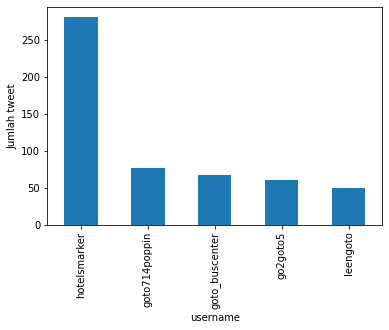

In [141]:
res.plot(kind='bar').set_ylabel("Jumlah tweet")

# 5

*follower* dari akun @hampersbymiya menggunakan instaloader 

In [4]:
profile = Profile.from_username(loader.context, 'hampersbymiya')
# objek profile
profile

<Profile hampersbymiya (47726860011)>

In [151]:
df_profile = pd.DataFrame({
    'userid': [profile.userid],
    'username': [profile.username],
    'is_private': [profile.is_private],
    'mediacount': [profile.mediacount],
    'igtvcount': [profile.igtvcount],
    'followers': [profile.followers],
    'followees': [profile.followees],
    'external_url': [profile.external_url],
    'is_business_account': [profile.is_business_account],
    'business_category_name': [profile.business_category_name],
    'biography': [profile.biography],
    'full_name': [profile.full_name],
    'has_public_story': [profile.has_public_story],
    'is_verified': [profile.is_verified],
    'profile_pic_url': [profile.profile_pic_url]
}) 

df_profile

,userid,username,is_private,mediacount,igtvcount,followers,followees,external_url,is_business_account,business_category_name,biography,full_name,has_public_story,is_verified,profile_pic_url
0,47726860011,hampersbymiya,False,78,4,635,121,https://linktr.ee/Hampersbymiya,True,Personal Goods & General Merchandise Stores,Gift you will admire 💝\nCurated by @lilyanaputri @tennyradestriana @meaqr ✨\nOrder maks H-1 jam 13.00 \nClick for order or more info\n⬇️⬇️⬇️,Hampers & Gift Set Bandung,False,False,https://instagram.fbdo1-1.fna.fbcdn.net/v/t51.2885-19/194582713_816478615660455_2603408664688059549_n.jpg?_nc_ht=instagram.fbdo1-1.fna.fbcdn.net&_nc_cat=103&_nc_ohc=5cRBzCTLf3EAX_54KIl&edm=AEF8tYYBAAAA&ccb=7-4&oh=00_AT8JU1zD9feLwfzUgl-Q93wJOQSXkrivvwQyuSeRYXY2TA&oe=623FA90C&_nc_sid=a9513d


In [6]:
list_followers = []
for p in profile.get_followers():
    list_followers.append(
    {
    'userid': [p.userid],
    'username': [p.username],
    'is_private': [p.is_private],
    'mediacount': [p.mediacount],
    'igtvcount': [p.igtvcount],
    'followers': [p.followers],
    'followees': [p.followees],
    'external_url': [p.external_url],
    'is_business_account': [p.is_business_account],
    'business_category_name': [p.business_category_name],
    'biography': [p.biography],
    'full_name': [p.full_name],
    'has_public_story': [p.has_public_story],
    'is_verified': [p.is_verified],
    'profile_pic_url': [p.profile_pic_url]
    }
    )


Too many queries in the last time. Need to wait 75 seconds, until 06:57.

Too many queries in the last time. Need to wait 79 seconds, until 07:08.

Too many queries in the last time. Need to wait 92 seconds, until 07:16.

Too many queries in the last time. Need to wait 21 seconds, until 07:20.

Too many queries in the last time. Need to wait 68 seconds, until 07:27.

Too many queries in the last time. Need to wait 20 seconds, until 07:33.


JSON Query to el_caraka_senja/feed/: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None)) [retrying; skip with ^C]



Too many queries in the last time. Need to wait 54 seconds, until 07:39.

Too many queries in the last time. Need to wait 67 seconds, until 07:47.

Too many queries in the last time. Need to wait 22 seconds, until 07:54.

Too many queries in the last time. Need to wait 21 seconds, until 07:55.

Too many queries in the last time. Need to wait 18 seconds, until 07:56.

Too many queries in the last time. Need to wait 67 seconds, until 07:58.

Too many queries in the last time. Need to wait 24 seconds, until 08:05.

Too many queries in the last time. Need to wait 18 seconds, until 08:06.

Too many queries in the last time. Need to wait 56 seconds, until 08:09.

Too many queries in the last time. Need to wait 89 seconds, until 08:17.


In [7]:
len(list_followers)

634

In [8]:
list_followers

[{'userid': [941594177],
  'username': ['dianutamianinda'],
  'is_private': [True],
  'mediacount': [270],
  'igtvcount': [9],
  'followers': [668],
  'followees': [1790],
  'external_url': [None],
  'is_business_account': [False],
  'business_category_name': [None],
  'biography': [''],
  'full_name': ['DIANANINDA'],
  'has_public_story': [False],
  'is_verified': [False],
  'profile_pic_url': ['https://instagram.fbdo1-2.fna.fbcdn.net/v/t51.2885-19/38811240_2118354328387139_4883075024652599296_n.jpg?_nc_ht=instagram.fbdo1-2.fna.fbcdn.net&_nc_cat=111&_nc_ohc=ZAIwpZFNrVUAX8oDr20&edm=AEF8tYYBAAAA&ccb=7-4&oh=00_AT_vITT9J5IvrvObAP0XwEQw8NWJWK1ufP-5exwRK2va9w&oe=6245AC26&_nc_sid=a9513d']},
 {'userid': [1015900134],
  'username': ['srianik'],
  'is_private': [False],
  'mediacount': [114],
  'igtvcount': [0],
  'followers': [959],
  'followees': [707],
  'external_url': [None],
  'is_business_account': [False],
  'business_category_name': [None],
  'biography': ['menerima pesanan coklat kara

In [12]:

pd.DataFrame(list_followers).to_csv("hasil_c5.csv")

# 6

<tr><td>F-Q</td>
<td>https://www.linkedin.com/company/bank-mandiri/</td></tr>

In [166]:
# login
link = 'https://www.linkedin.com/login/in?fromSignIn=true&trk=guest_homepage-basic_nav-header-signin'
open_driver(link)
xpath = '//input[@id="username"]'
fill_in(xpath, '') # diisi
xpath = '//input[@id="password"]'
fill_in(xpath, '') # diisi
xpath = '//button[@class="btn__primary--large from__button--floating"]'
get_single_element(xpath).click()

C:\Users\ichsan\AppData\Local\Temp\ipykernel_14888\1105613198.py:32: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(driver_path)
C:\Users\ichsan\AppData\Local\Temp\ipykernel_14888\1105613198.py:9: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  return driver.find_element_by_xpath(xpath)


In [223]:
link = 'https://www.linkedin.com/company/bank-mandiri/'
driver.get(link)

In [224]:
xpath = '//*[@id="ember35"]/div[2]/div[1]/div[1]/div[2]/div/h1/span'
name = get_content(xpath)
## alternatif
# name = driver.find_element_by_class_name("t-24").get_attribute("title")
name

C:\Users\ichsan\AppData\Local\Temp\ipykernel_14888\1105613198.py:9: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  return driver.find_element_by_xpath(xpath)


'PT Bank Mandiri (Persero) Tbk.'

In [226]:
xpath = '//*[@id="ember35"]/div[2]/div[1]/div[1]/div[2]/div/p'
try:
    bio = get_content(xpath)
    ## alternatif
    # bio = driver.find_element_by_class_name("org-top-card-summary__tagline").text
except:
    bio = None
    print("No bio")
bio

C:\Users\ichsan\AppData\Local\Temp\ipykernel_14888\1105613198.py:9: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  return driver.find_element_by_xpath(xpath)


'#11 Best Employers in "Global 2000: World\'s Best Employers"\u200b (by Forbes.com)'

In [227]:
xpath = '//*[@id="ember35"]/div[2]/div[1]/div[1]/div[2]/div/div/div[2]/div[2]'
c_followers = get_content(xpath)
## alternatif
# c_followers = driver.find_element_by_class_name("org-top-card-secondary-content__see-all").text


C:\Users\ichsan\AppData\Local\Temp\ipykernel_14888\1105613198.py:9: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  return driver.find_element_by_xpath(xpath)


In [230]:
c_followers = c_followers.split()[0]

In [231]:
c_followers = c_followers.replace(",", "")
c_followers

'305269'

In [232]:
res = {
    "nama": name,
    "bio": bio,
    "followers": c_followers
}

res

{'nama': 'PT Bank Mandiri (Persero) Tbk.',
 'bio': '#11 Best Employers in "Global 2000: World\'s Best Employers"\u200b (by Forbes.com)',
 'followers': '305269'}

# Bonus

In [235]:
# menuju link employees
xpath = '//*[@id="ember40"]'

button = driver.find_element_by_xpath(xpath)

button.click() 


C:\Users\ichsan\AppData\Local\Temp\ipykernel_14888\783039617.py:4: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  button = driver.find_element_by_xpath(xpath)


In [236]:
print("Menampilkan link semua karyawan pada halaman pertama pencarian")
for e in driver.find_elements_by_class_name("entity-result__title-text"):
    a = e.find_element_by_class_name("app-aware-link").get_attribute("href")
    print(a)

Menampilkan link semua karyawan pada halaman pertama pencarian
https://www.linkedin.com/in/tashatantyani?miniProfileUrn=urn%3Ali%3Afs_miniProfile%3AACoAAB-BS1kBf24SkkiQe439SAoxljvxyhUHIww
https://www.linkedin.com/in/muhammad-feisal-gibran-maulana-473243199?miniProfileUrn=urn%3Ali%3Afs_miniProfile%3AACoAAC58wtcBaf53uYyN8K12XdJsH3hWQ_F9KMU
https://www.linkedin.com/in/dinar-aprilla-sari?miniProfileUrn=urn%3Ali%3Afs_miniProfile%3AACoAAC_vApoBR66oAByW5Ik4nI3FdKe37KKCi1A
https://www.linkedin.com/in/mifthahul-jannah-807087192?miniProfileUrn=urn%3Ali%3Afs_miniProfile%3AACoAAC03m8cBe-7Cv7hcA4NxQXWVuf3L-gwAKHU
https://www.linkedin.com/in/falih-prayogo-77b02817a?miniProfileUrn=urn%3Ali%3Afs_miniProfile%3AACoAACpcvE8Bo9j1nZuHG6ZLNX7lX158SKzZgc4
https://www.linkedin.com/in/bagus-isattama?miniProfileUrn=urn%3Ali%3Afs_miniProfile%3AACoAAAS-4m4BBSFkxQkTaSkyB3a0eoPJVbMnDmo


C:\Users\ichsan\AppData\Local\Temp\ipykernel_14888\3081633066.py:2: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  for e in driver.find_elements_by_class_name("entity-result__title-text"):
C:\ProgramData\Anaconda3\lib\site-packages\selenium\webdriver\remote\webelement.py:446: UserWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  warnings.warn("find_element_by_* commands are deprecated. Please use find_element() instead")


https://www.linkedin.com/in/grace-anneke-81327221?miniProfileUrn=urn%3Ali%3Afs_miniProfile%3AACoAAAR88Q8BhY9G2ayp6oSZVc_21mm3Xh3w_18
https://www.linkedin.com/in/rika-fitria-septiani-919aa4141?miniProfileUrn=urn%3Ali%3Afs_miniProfile%3AACoAACKC0iUB-sR6Dfo06XhKik19SFOBTB3ZDuw
https://www.linkedin.com/in/jasmine-alya-nisa?miniProfileUrn=urn%3Ali%3Afs_miniProfile%3AACoAAC04JzEB-WhO-SNz6mUelsaYBjvEYOMujac
https://www.linkedin.com/in/septian-yosdiawan-65b19a92?miniProfileUrn=urn%3Ali%3Afs_miniProfile%3AACoAABOazCcBuTgfjhRKab6iHXAiMui45TVIJWQ


In [237]:
print("Menampilkan link semua karyawan pada halaman pertama pencarian dan kontak yang berhungan dengan saya")
el = driver.find_elements_by_class_name('app-aware-link')

list_link = []
for link in el:
    this_link = link.get_attribute("href")
    if this_link not in list_link:
        print(this_link.split("?")[0])
        list_link.append(this_link)

Menampilkan link semua karyawan pada halaman pertama pencarian dan kontak yang berhungan dengan saya
https://www.linkedin.com/in/tashatantyani
https://www.linkedin.com/in/ACoAACptsvABpMeDLFMX3AT70ss-dnRiWAZT7Bg
https://www.linkedin.com/in/muhammad-feisal-gibran-maulana-473243199
https://www.linkedin.com/in/ACoAABtYq78BLNlun6E2qLqlydJzUIXpQ7ViOrg
https://www.linkedin.com/in/dinar-aprilla-sari
https://www.linkedin.com/in/ACoAADVmNsYBKbK0eTFQID8QszLkwttSRWVDoCI
https://www.linkedin.com/in/ACoAADZDOiQBWmbGZfpWwQOItJmRwdJ54vrpjOs
https://www.linkedin.com/in/mifthahul-jannah-807087192
https://www.linkedin.com/in/ACoAAAQM6GcB9AIzhssnAnhaKSKdOBnZm3vKQBo
https://www.linkedin.com/in/falih-prayogo-77b02817a


C:\Users\ichsan\AppData\Local\Temp\ipykernel_14888\2000479343.py:2: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  el = driver.find_elements_by_class_name('app-aware-link')


https://www.linkedin.com/in/ACoAADR4SqQBlb_o4XZe6npli6cE0-Shjpb_HCw
https://www.linkedin.com/in/bagus-isattama
https://www.linkedin.com/in/ACoAAA03CnIBvlad8miIWhvJ7NYOBTSRd3bP5UQ
https://www.linkedin.com/in/grace-anneke-81327221
https://www.linkedin.com/in/rika-fitria-septiani-919aa4141
https://www.linkedin.com/in/ACoAACyDj6sB2HZEMdJLISlAS_KG8k7iOXuW1DQ
https://www.linkedin.com/in/ACoAADebHLcB9i16m7hzHXux3AfCGyYt5LbBF4M
https://www.linkedin.com/in/jasmine-alya-nisa
https://www.linkedin.com/in/ACoAADPsohMBrWnyGa8vfgAFLEtafZYWBohZBSc
https://www.linkedin.com/in/septian-yosdiawan-65b19a92
